In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error


from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load cleaned dataset
df = pd.read_csv('data/climate_all_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')



In [21]:
# Drop columns not useful for modeling
df_model = df.drop(columns=['Date', 'Time of maximum wind gust'], errors='ignore')

# Forward fill missing values (future-proof way)
df_model.ffill(inplace=True)

# One-hot encode categorical features
df_model = pd.get_dummies(df_model, drop_first=True)

# Define features and target
target = 'Maximum temperature (°C)'
X = df_model.drop(columns=[target])
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = root_mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("🌲 Random Forest Results")
print(f"MAE : {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²  : {rf_r2:.3f}")


🌲 Random Forest Results
MAE : 0.80
RMSE: 1.03
R²  : 0.971


In [23]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = root_mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("\n⚡ XGBoost Results")
print(f"MAE : {xgb_mae:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R²  : {xgb_r2:.3f}")



⚡ XGBoost Results
MAE : 0.84
RMSE: 1.08
R²  : 0.969


In [24]:
comparison = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'MAE': [rf_mae, xgb_mae],
    'RMSE': [rf_rmse, xgb_rmse],
    'R²': [rf_r2, xgb_r2]
})

print("\nModel Comparison")
display(comparison.sort_values(by='RMSE'))



Model Comparison


,Model,MAE,RMSE,R²
0,Random Forest,0.800669,1.033775,0.971377
1,XGBoost,0.844146,1.076117,0.968984


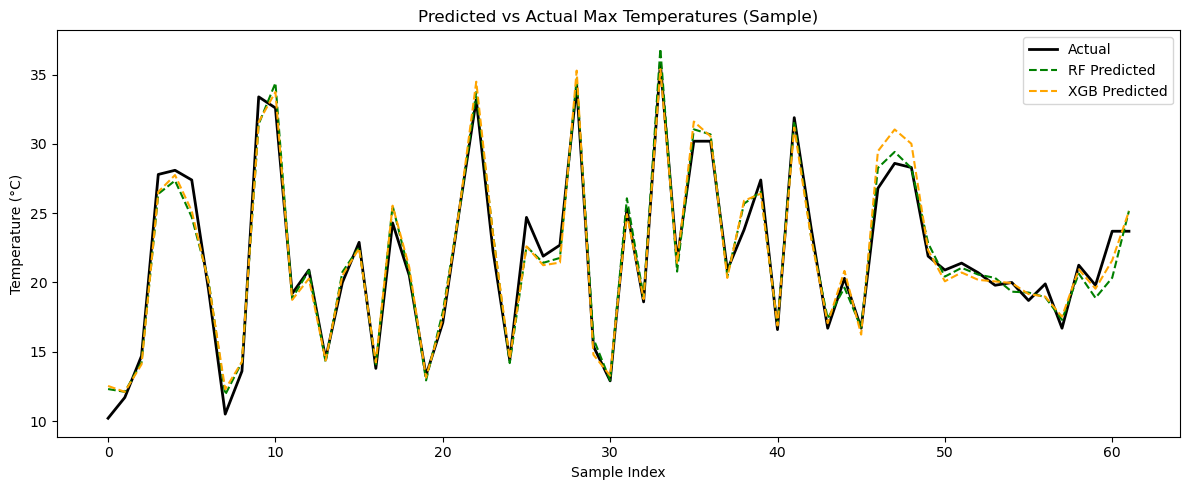

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual', color='black', linewidth=2)
plt.plot(rf_pred[:100], label='RF Predicted', color='green', linestyle='--')
plt.plot(xgb_pred[:100], label='XGB Predicted', color='orange', linestyle='--')
plt.title("Predicted vs Actual Max Temperatures (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import joblib
import os

# Make sure models/ exists
os.makedirs("models", exist_ok=True)

# Save model
joblib.dump(rf_model, 'models/best_model.pkl')

# ✅ Save feature columns used during training
joblib.dump(X.columns.tolist(), 'models/model_features.pkl')

print("✅ Model and features saved successfully.")
